<br>
<h1 style = "font-size:30px; font-family:cursive ; font-weight : bold; color : #009616; text-align: center; border-radius: 10px 100px;"> Understanding Regularization in Machine Learning</h1>
<br>

![](https://miro.medium.com/max/1050/1*rrjJaesIzo46XTT3y-SYXA.gif)

### It is highly recommended to read the documentation before implementing any alogorithm.

- **Linear Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- **Lasso Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html <br>
- **Lasso CV** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV <br>
- **Ridge Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html <br>
- **Ridge CV** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV

- **R2_SCORE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html <br>
- **MSE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html <br>
- **MAE** : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

<span style="font-size:20px;color:#AA0078;font-weight : bold">1) Import Numpy, Pandas, Matplotlib, Seaborn and Linear Regression</span>

In [1]:
## ======== YOUR CODE HERE ======== ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## ================================ ##

## Import Lasso,Rigde along with thier CV versions. This step is done for you.
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

## Import evaluation metrics and scalers.
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

<span style="font-size:20px;color:#AA0078;font-weight : bold">2) Read the provided dataset.</span>

In [2]:
## ======== YOUR CODE HERE ======== ##

df=pd.read_csv("Data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<span style="font-size:20px;color:#AA0078;font-weight : bold">3) Check the shape of the dataset</span>

In [3]:
## ======== YOUR CODE HERE ======== ##
  ## It should come as (1460,81) ##
df.shape

(1460, 81)

<span style="font-size:20px;color:#AA0078;font-weight : bold">4) Assign all the numerical features of the Dataset as df_num and apply describe method on it.</span>

In [4]:
## Categorical features comes under "object" data-types. SO try exculding them.(This has been done for you.)
## Use decribe on the assigned variable. 
df_num = df.select_dtypes(exclude="object")
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<span style="font-size:20px;color:#AA0078;font-weight : bold">5) Check the correlation for whole dataset</span>

In [5]:
## ======== YOUR CODE HERE ======== ##
df.corr().style.background_gradient(cmap='GnBu')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<span style="font-size:20px;color:#AA0078;font-weight : bold">6) Feature Encoding for categorical columns:</span>

In [6]:
## Include "object" data-types for categorical columns.
df_cat = df.select_dtypes(include="object").columns.values

## Use One Hot encoding on the df and use columns as df_cat

## ======== YOUR CODE HERE ======== ##
df_encoded=pd.get_dummies(df,columns=df_cat)

In [7]:
print("Shape before Encoding:",df.shape)
print("\nShape after Encoding:",df_encoded.shape)

Shape before Encoding: (1460, 81)

Shape after Encoding: (1460, 290)


In [8]:
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<span style="font-size:20px;color:#AA0078;font-weight : bold">7) Check NAN value in the dataset and fill it with '0' with inplace=True</span>

In [9]:
df2 = df_encoded.copy()

## ======== YOUR CODE HERE ======== ##

df2.fillna(0, inplace=True)

In [10]:
df2.isnull().sum().max()

0

<span style="font-size:20px;color:#AA0078;font-weight : bold">8) Drop 'Id' and 'SalePrice' column from cleaned encoded data (df2) and assign it to variable X</span>

In [11]:
## ======== YOUR CODE HERE ======== ##

X = df2.drop(['Id','SalePrice'],axis=1)

## ================================ ##

Y = df2['SalePrice']

<span style="font-size:20px;color:#AA0078;font-weight : bold">9) Use train-test split on X and Y using random_state = 2021 and test_size = 0.25</span>

In [12]:
## ======== YOUR CODE HERE ======== ##

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2021)

## ================================ ##

In [13]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

print('\nExpected shapes:\n')
print("X_train:(1095, 288)")
print("X_test: (365, 288)")
print("y_train:(1095,)")
print("y_test:(365,)")
print('\nVerify if they are matching')

X_train: (1095, 288)
X_test: (365, 288)
y_train: (1095,)
y_test: (365,)

Expected shapes:

X_train:(1095, 288)
X_test: (365, 288)
y_train:(1095,)
y_test:(365,)

Verify if they are matching


<span style="font-size:20px;color:#AA0078;font-weight : bold">10) Train the Linear Regression Model with all default parameters.</span>

In [14]:
## ======== YOUR CODE HERE ======== ##

linreg = LinearRegression()

linreg.fit(X_train,y_train)

## ================================ ##

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
## Check the intercept of Linear regression model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Linear Model:",linreg.intercept_)

## ================================ ##

Intercept for Linear Model: 616028.4616170877


In [16]:
## ================================ ##
    ## Run this cell as it is ## 
## ================================ ##
print("Linear Regression Training R2 score is",r2_score(y_train,linreg.predict(X_train)))
print("Linear Regression Testing R2 score is",r2_score(y_test,linreg.predict(X_test)))
print("-"*50)
print("Linear Regression Training mean_square_error is",mean_squared_error(y_train,linreg.predict(X_train)))
print("Linear Regression Testing mean_square_error is",mean_squared_error(y_test,linreg.predict(X_test)))
print("-"*50)
print("Linear Regression Training mean_absolute_error is",mean_absolute_error(y_train,linreg.predict(X_train)))
print("Linear Regression Testing mean_absolute_error is",mean_absolute_error(y_test,linreg.predict(X_test)))

Linear Regression Training R2 score is 0.9372168985650277
Linear Regression Testing R2 score is 0.170521329997269
--------------------------------------------------
Linear Regression Training mean_square_error is 400415637.59458566
Linear Regression Testing mean_square_error is 5043619337.844046
--------------------------------------------------
Linear Regression Training mean_absolute_error is 12686.710403046176
Linear Regression Testing mean_absolute_error is 22092.9306528388


<span style="font-size:20px;color:#AA0078;font-weight : bold">11) Train the Linear model with L1 regularization aka Lasso</span>

In [17]:
## ======== YOUR CODE HERE ======== ##

lasso = Lasso()

lasso.fit(X_train,y_train)

## ================================ ##

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232543135069.82477, tolerance: 698364867.5276122
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
## Check the intercept of Lasso model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Lasso Model:",lasso.intercept_)

## ================================ ##


Intercept for Lasso Model: 551578.6331543552


In [19]:
## Find the training and testing error for Lasso Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Lasso Model Training R2 score is",r2_score(y_train,lasso.predict(X_train)))
print("Lasso Model Testing R2 score is",r2_score(y_test,lasso.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error is",mean_squared_error(y_train,lasso.predict(X_train)))
print("Lasso Model Testing mean_square_error is",mean_squared_error(y_test,lasso.predict(X_test)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error is",mean_absolute_error(y_train,lasso.predict(X_train)))
print("Lasso Model Testing mean_absolute_error is",mean_absolute_error(y_test,lasso.predict(X_test)))

## ================================ ##

Lasso Model Training R2 score is 0.9346414357986955
Lasso Model Testing R2 score is 0.8965840839866219
--------------------------------------------------
Lasso Model Training mean_square_error is 416841324.4770682
Lasso Model Testing mean_square_error is 628817271.2677613
--------------------------------------------------
Lasso Model Training mean_absolute_error is 13123.084998402242
Lasso Model Testing mean_absolute_error is 17124.8126791845


<span style="font-size:20px;color:#AA0078;font-weight : bold">12) Train the Linear model with L2 regularization aka Ridge </span>

In [20]:
## ======== YOUR CODE HERE ======== ##

ridge = Ridge()

ridge.fit(X_train, y_train)

## ================================ ##

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
## Check the intercept of Ridge model

## ======== YOUR CODE HERE ======== ##

print("Intercept for Ridge Model:",ridge.intercept_)

## ================================ ##

Intercept for Ridge Model: 960573.0057827348


In [22]:
## Find the training and testing error for Ridge Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model Training R2 score is",r2_score(y_train,ridge.predict(X_train)))
print("Ridge Model Testing R2 score is",r2_score(y_test,ridge.predict(X_test)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error is",mean_squared_error(y_train,ridge.predict(X_train)))
print("Ridge Model Testing mean_square_error is",mean_squared_error(y_test,ridge.predict(X_test)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error is",mean_absolute_error(y_train,ridge.predict(X_train)))
print("Ridge Model Testing mean_absolute_error is",mean_absolute_error(y_test,ridge.predict(X_test)))

## ================================ ##

Ridge Model Training R2 score is 0.9217358204324827
Ridge Model Testing R2 score is 0.8893859749836945
--------------------------------------------------
Ridge Model Training mean_square_error is 499150259.322616
Ridge Model Testing mean_square_error is 672585149.9076722
--------------------------------------------------
Ridge Model Training mean_absolute_error is 14490.494070072076
Ridge Model Testing mean_absolute_error is 17592.85129490369


<span style="font-size:20px;color:#AA0078;font-weight : bold">13) Feature Transformation </span>

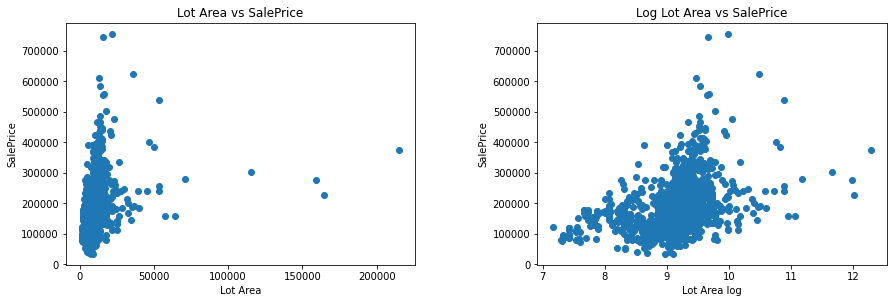

In [23]:
plt.subplot(122)
plt.xlabel("Lot Area log")
plt.ylabel("SalePrice")
plt.title("Log Lot Area vs SalePrice")

## Plot a scatter plot with x as LOG-TRANSFORMED lot Area and y as Sale Price from original dataframe df.
## ======== YOUR CODE HERE ======== ##

plt.scatter(np.log(df["LotArea"]),df["SalePrice"])


## ================================ ##



plt.subplot(121)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")
plt.title("Lot Area vs SalePrice")

## Plot a scatter plot with x as lot Area and y as Sale Price from original dataframe df.

## ======== YOUR CODE HERE ======== ##

plt.scatter(df["LotArea"],df["SalePrice"])

## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

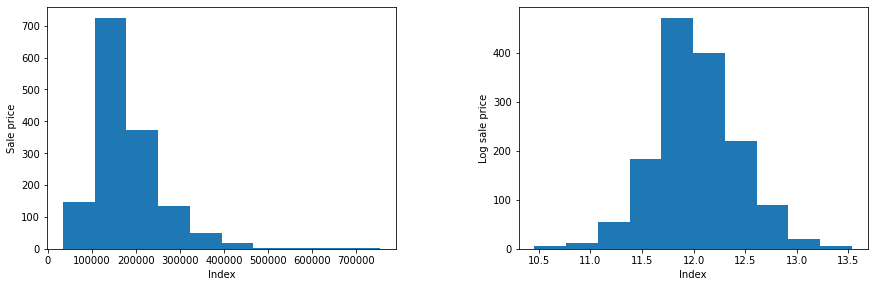

In [24]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(df["SalePrice"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")

## Plot a histogram for LOG-TRANSFORMED SALE PRICE COLUMN. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##

plt.hist(np.log1p(df["SalePrice"]))

## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

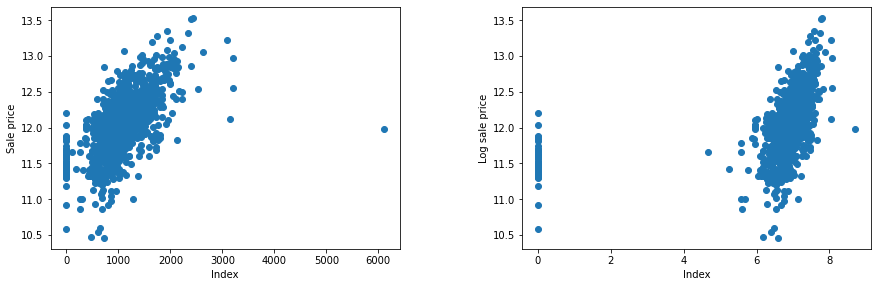

In [25]:
## ================================ ##
    ## Run this cell as it is ## 
## ================================ ##

plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.scatter(df["TotalBsmtSF"],np.log1p(df["SalePrice"]))

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")
plt.scatter(np.log1p(df["TotalBsmtSF"]),np.log1p(df["SalePrice"]))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

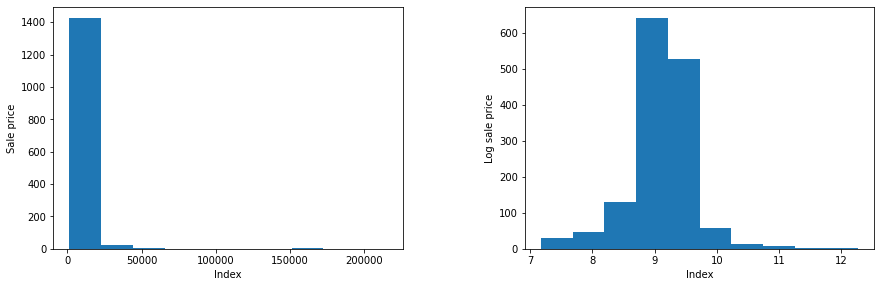

In [26]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Sale price")
plt.hist(df["LotArea"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log sale price")

## Plot a histogram for LOG-TRANSFORMED LOT AREA. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##

plt.hist(np.log1p(df["LotArea"]))

## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25, wspace=0.35)

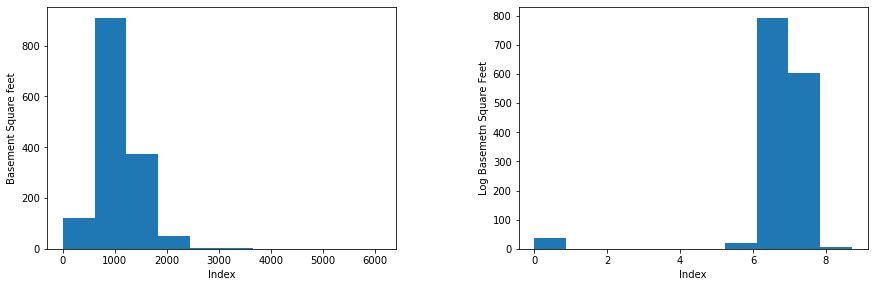

In [27]:
plt.subplot(121)
plt.xlabel("Index")
plt.ylabel("Basement Square feet")
plt.hist(df["TotalBsmtSF"])

plt.subplot(122)
plt.xlabel("Index")
plt.ylabel("Log Basemetn Square Feet")

## Plot a histogram for LOG-TRANSFORMED TOTAL BASEMENT SQ. FEET. Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##

plt.hist(np.log1p(df["TotalBsmtSF"]))

## ================================ ##

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25, wspace=0.35)

<span style="font-size:20px;color:#AA0078;font-weight : bold">14) Transform the 'SalePrice' logarithmically and apply train-test split like before.</span>

In [28]:
## Use np.log1p instead of np.log

## ======== YOUR CODE HERE ======== ##

y1 = np.log1p(Y)

## ================================ ##


In [29]:
## Use random state as 2021 and test size as 0.25

## ======== YOUR CODE HERE ======== ##

X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X,y1,test_size=0.25,random_state=2021)

## ================================ ##


In [30]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train_trans.shape) # X_train_trans
print("X_test:",X_test_trans.shape)    # X_test_trans
print("y_train:",y_train_trans.shape)  # y_train_trans
print("y_test:",y_test_trans.shape)    # y_test_trans

## ================================ ##

print('\nExpected shapes:\n')
print("X_train:(1095, 288)")
print("X_test: (365, 288)")
print("y_train:(1095,)")
print("y_test:(365,)")
print('\nVerify if they are matching')

X_train: (1095, 288)
X_test: (365, 288)
y_train: (1095,)
y_test: (365,)

Expected shapes:

X_train:(1095, 288)
X_test: (365, 288)
y_train:(1095,)
y_test:(365,)

Verify if they are matching


<span style="font-size:20px;color:#AA0078;font-weight : bold">15) Train Linear Regression on transformed data with all default parameters.</span>

In [31]:
## ======== YOUR CODE HERE ======== ##

lr_trans = LinearRegression()

lr_trans.fit(X_train_trans,y_train_trans)

## ================================ ##

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
## Check the intercept of New Linear Model

## ======== YOUR CODE HERE ======== ##

print("Intercept for New Linear Model:",lr_trans.intercept_)

## ================================ ##

Intercept for New Linear Model: 12.562437720886225


In [33]:
## Find the training and testing error for Linear transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Linear Regression Training R2 score with log transformation is",r2_score(np.exp(y_train_trans),np.exp(lr_trans.predict(X_train_trans))))
print("Linear Regression Testing R2 score with log transformation is",r2_score(np.exp(y_test_trans),np.exp(lr_trans.predict(X_test_trans))))
print("-"*50)

## Mean Square Error (MSE)
print("Linear Regression Training mean_square_error with log transformation is",mean_squared_error(np.exp(y_train_trans),np.exp(lr_trans.predict(X_train_trans))))
print("Linear Regression Testing mean_square_error with log transformation is",mean_squared_error(np.exp(y_test_trans),np.exp(lr_trans.predict(X_test_trans))))
print("-"*50)

## Mean Absolute Error (MAE)
print("Linear Regression Training mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_train_trans),np.exp(lr_trans.predict(X_train_trans))))
print("Linear Regression Testing mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_test_trans),np.exp(lr_trans.predict(X_test_trans))))

## ================================ ##

Linear Regression Training R2 score with log transformation is 0.9475985296853087
Linear Regression Testing R2 score with log transformation is 0.9282192173973374
--------------------------------------------------
Linear Regression Training mean_square_error with log transformation is 334204071.9138953
Linear Regression Testing mean_square_error with log transformation is 436460823.3014323
--------------------------------------------------
Linear Regression Training mean_absolute_error with log transformation is 11510.354973897596
Linear Regression Testing mean_absolute_error with log transformation is 14577.075832983091


<span style="font-size:20px;color:#AA0078;font-weight : bold">16) Train Lasso model on the transformed data.</span>

In [34]:
## ======== YOUR CODE HERE ======== ##

lasso_model_trans = Lasso()

lasso_model_trans.fit(X_train_trans,y_train_trans)

## ================================ ##

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
## Find the training and testing error for Lasso Transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Lasso Model Training R2 score with log transformation is",r2_score(np.exp(y_train_trans),np.exp(lasso_model_trans.predict(X_train_trans))))
print("Lasso Model Testing R2 score with log transformation is",r2_score(np.exp(y_test_trans),np.exp(lasso_model_trans.predict(X_test_trans))))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error with log transformation is",mean_squared_error(np.exp(y_train_trans),np.exp(lasso_model_trans.predict(X_train_trans))))
print("Lasso Model Testing mean_square_error with log transformation is",mean_squared_error(np.exp(y_test_trans),np.exp(lasso_model_trans.predict(X_test_trans))))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_train_trans),np.exp(lasso_model_trans.predict(X_train_trans))))
print("Lasso Model Testing mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_test_trans),np.exp(lasso_model_trans.predict(X_test_trans))))

## ================================ ##

Lasso Model Training R2 score with log transformation is -0.19022112309944705
Lasso Model Testing R2 score with log transformation is 0.8459323459234126
--------------------------------------------------
Lasso Model Training mean_square_error with log transformation is 7590946273.62476
Lasso Model Testing mean_square_error with log transformation is 936803594.2797481
--------------------------------------------------
Lasso Model Training mean_absolute_error with log transformation is 24871.559134570176
Lasso Model Testing mean_absolute_error with log transformation is 20831.75352771473


<span style="font-size:20px;color:#AA0078;font-weight : bold">17) Train Ridge Model on the transformed data.</span>

In [36]:
## ======== YOUR CODE HERE ======== ##

ridge_trans = Ridge()

ridge_trans.fit(X_train_trans, y_train_trans)

## ================================ ##

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
## Find the training and testing error for Ridge Transformed Model

## ======== YOUR CODE HERE ======== ##

## Since we have used log transformation, so we have to transformed it back using np.exp while calculating error.

## R2 score
print("Ridge Model Training R2 score with log transformation is",r2_score(np.exp(y_train_trans),np.exp(ridge_trans.predict(X_train_trans))))
print("Ridge Model Testing R2 score with log transformation is",r2_score(np.exp(y_test_trans),np.exp(ridge_trans.predict(X_test_trans))))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error with log transformation is",mean_squared_error(np.exp(y_train_trans),np.exp(ridge_trans.predict(X_train_trans))))
print("Ridge Model Testing mean_square_error with log transformation is",mean_squared_error(np.exp(y_test_trans),np.exp(ridge_trans.predict(X_test_trans))))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_train_trans),np.exp(ridge_trans.predict(X_train_trans))))
print("Ridge Model Testing mean_absolute_error with log transformation is",mean_absolute_error(np.exp(y_test_trans),np.exp(ridge_trans.predict(X_test_trans))))

## ================================ ##

Ridge Model Training R2 score with log transformation is 0.934525818697692
Ridge Model Testing R2 score with log transformation is 0.9332762341535801
--------------------------------------------------
Ridge Model Training mean_square_error with log transformation is 417578702.7549332
Ridge Model Testing mean_square_error with log transformation is 405711789.6903533
--------------------------------------------------
Ridge Model Training mean_absolute_error with log transformation is 12901.088111174526
Ridge Model Testing mean_absolute_error with log transformation is 13930.008445658012


<span style="font-size:20px;color:#AA0078;font-weight : bold">18) Scaling the data with Standard Scaler.</span>

In [38]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## ================================ ##

<span style="font-size:20px;color:#AA0078;font-weight : bold">19) Train Lasso Model on the scaled data.</span>

In [39]:
## ======== YOUR CODE HERE ======== ##

lasso_model_scaled = Lasso()

lasso_model_scaled.fit(X_train_scaled,y_train)

## ================================ ##

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218459257233.2197, tolerance: 698364867.5276122
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
## Find the training and testing error for Lasso scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Lasso Model Training R2 score on scaled data is",r2_score(y_train,lasso_model_scaled.predict(X_train_scaled)))
print("Lasso Model Testing R2 score on scaled data is",r2_score(y_test,lasso_model_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Lasso Model Training mean_square_error on scaled data is",mean_squared_error(y_train,lasso_model_scaled.predict(X_train_scaled)))
print("Lasso Model Testing mean_square_error on scaled data is",mean_squared_error(y_test,lasso_model_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Lasso Model Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,lasso_model_scaled.predict(X_train_scaled)))
print("Lasso Model Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,lasso_model_scaled.predict(X_test_scaled)))

## ================================ ##

Lasso Model Training R2 score on scaled data is 0.9352145006586579
Lasso Model Testing R2 score on scaled data is 0.8735070929023248
--------------------------------------------------
Lasso Model Training mean_square_error on scaled data is 413186453.5637133
Lasso Model Testing mean_square_error on scaled data is 769136200.1338077
--------------------------------------------------
Lasso Model Training mean_absolute_error on scaled data is 13026.009469219587
Lasso Model Testing mean_absolute_error on scaled data is 17855.400816493737


<span style="font-size:20px;color:#AA0078;font-weight : bold">20) Train Ridge Model on the scaled data.</span>

In [41]:
## ======== YOUR CODE HERE ======== ##

ridge_scaled = Ridge()

ridge_scaled.fit(X_train_scaled, y_train)

## ================================ ##

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
## Find the training and testing error for Ridge scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model Training R2 score on scaled data is",r2_score(y_train,ridge_scaled.predict(X_train_scaled)))
print("Ridge Model Testing R2 score on scaled data is",r2_score(y_test,ridge_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model Training mean_square_error on scaled data is",mean_squared_error(y_train,ridge_scaled.predict(X_train_scaled)))
print("Ridge Model Testing mean_square_error on scaled data is",mean_squared_error(y_test,ridge_scaled.predict(X_test_scaled)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,ridge_scaled.predict(X_train_scaled)))
print("Ridge Model Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,ridge_scaled.predict(X_test_scaled)))

## ================================ ##

Ridge Model Training R2 score on scaled data is 0.9347531254069871
Ridge Model Testing R2 score on scaled data is 0.8903362798786313
--------------------------------------------------
Ridge Model Training mean_square_error on scaled data is 416128994.8104129
Ridge Model Testing mean_square_error on scaled data is 666806850.4549148
--------------------------------------------------
Ridge Model Training mean_absolute_error on scaled data is 13086.814173961864
Ridge Model Testing mean_absolute_error on scaled data is 17622.059980288668


<span style="font-size:20px;color:#AA0078;font-weight : bold">21) Train Ridge with cross validation on the scaled data.</span>

In [43]:
## ======== YOUR CODE HERE ======== ##

ridge_cv = RidgeCV()

ridge_cv.fit(X_train_scaled, y_train)

## ================================ ##

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [44]:
## Find the training and testing error for Ridge CV scaled Model

## ======== YOUR CODE HERE ======== ##

## R2 score
print("Ridge Model CV Training R2 score on scaled data is",r2_score(y_train,ridge_cv.predict(X_train_scaled)))
print("Ridge Model CV Testing R2 score on scaled data is",r2_score(y_test,ridge_cv.predict(X_test_scaled)))
print("-"*50)

## Mean Square Error (MSE)
print("Ridge Model CV Training mean_square_error on scaled data is",mean_squared_error(y_train,ridge_cv.predict(X_train_scaled)))
print("Ridge Model CV Testing mean_square_error on scaled data is",mean_squared_error(y_test,ridge_cv.predict(X_test_scaled)))
print("-"*50)

## Mean Absolute Error (MAE)
print("Ridge Model CV Training mean_absolute_error on scaled data is",mean_absolute_error(y_train,ridge_cv.predict(X_train_scaled)))
print("Ridge Model CV Testing mean_absolute_error on scaled data is",mean_absolute_error(y_test,ridge_cv.predict(X_test_scaled)))

## ================================ ##

Ridge Model CV Training R2 score on scaled data is 0.9338694640987362
Ridge Model CV Testing R2 score on scaled data is 0.8982910960572019
--------------------------------------------------
Ridge Model CV Training mean_square_error on scaled data is 421764775.7462661
Ridge Model CV Testing mean_square_error on scaled data is 618437837.2925853
--------------------------------------------------
Ridge Model CV Training mean_absolute_error on scaled data is 13194.862213157581
Ridge Model CV Testing mean_absolute_error on scaled data is 17077.1831408438


<br>
<h1 style = "font-size:30px; font-family:Brush Script MT ; font-weight : bold; color : #0331A8; text-align: center; border-radius: 10px 100px;">The End</h1>
<br>